# Session 1: Practical Logging and Procedures in Black-Box Optimization/Meta-heuristics
This session is meant for introducing you to the workflow with working with Meta-heuristics and compare the meta-heuristic algorithms discussed in the course of the first lecture. 

## Part 1: Application of the optimization algorithms studied during the lecture
In this section we will work with two functions/problems, namely the two-dimensional Rosenbrock function and the Rastrigin function (in 2-dimensions):
- Definition of the original Rosenbrock (2-D) Function (with $a=1$ and $b=100$):
$$f(x_1, x_2) = (1-x_1)^2 + 100(x_2 - x_1^2)^2 $$

- General definition of Rastrigin Function (with $A=10$ and $n$ the dimension):
$$ f(x_1,x_2, \cdots , x_n) = A n + \sum_{i=1}^{n} \left[ x_{i}^2 - A \cos \left(   2 \pi x_{i}  \right)  \right]$$

In [3]:
# Definition of the function to be optimized

import math

def rosenbrock(x):
    return (1 - x[0])**2  + 100*(x[1] - x[0]**2)**2

def rastrigin(x):
    return 10*len(x) + sum(xi**2 - 10*math.cos(2*math.pi*xi) for xi in x)

### Exercise 1: understading classical functions
 - Prove that $x^* = (1, 1)^T$ is the unique local minimum of the Rosenbrock function.

### Solution for Exercise 1: 
Compute gradient in general form, show that it is 0 at $x^*$ and hessian at this point is positive definite. Show that gradient is not 0 everywhere else


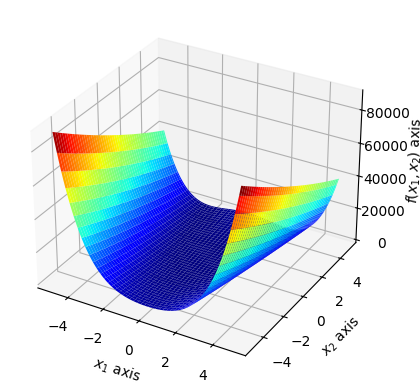

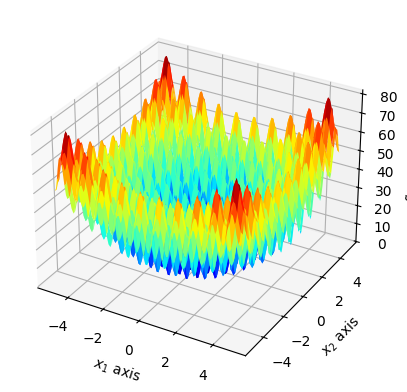

In [4]:
# Visualization in 3D

import numpy as np
import matplotlib.pyplot as plt

def vis3d(f, xrange=[-5, 5], yrange=[-5, 5]):
    # Create a grid of points
    x = np.linspace(*xrange, 100)
    y = np.linspace(*yrange, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.copy(X)
    for i in range(len(X)):
        for j in range(len(Y)):
            Z[i][j] = f([X[i][j], Y[i][j]])

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='jet')

    # Add labels
    ax.set_xlabel('$x_1$ axis')
    ax.set_ylabel('$x_2$ axis')
    ax.set_zlabel('$f(x_1, x_2)$ axis')

    plt.show()


vis3d(rosenbrock)
vis3d(rastrigin)

#### Genetic Algorithm

In [5]:
# Application of Genetic Algorithm
# pip install pygad

import pygad


def GA(F, dim=2, maxiter=50):
    def fitness_func(ga_instance, solution, solution_idx):
        return -F(solution)

    fitness_function = fitness_func

    num_generations = maxiter
    num_parents_mating = 4
    sol_per_pop = 8
    num_genes = dim
    init_range_low = -2
    init_range_high = 5
    parent_selection_type = "sss"
    keep_parents = 1
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 10

    ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)
    ga_instance.run()
    return ga_instance.best_solution()[0], -ga_instance.best_solution()[1]
    

GA(rosenbrock, 2)

/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is depreca

(array([0.70985264, 0.50667588]), 0.08496116936796512)

#### Differential Evolution

In [6]:
# Application of Differential Evolution
# pip install scipy

from scipy.optimize import differential_evolution

def DE(F, dim=2, maxiter=50):
    bounds = [(-5, 5) for i in range(dim)]
    # Perform the differential evolution optimization
    result = differential_evolution(F, bounds, maxiter=maxiter)
    return result.x, result.fun

DE(rosenbrock, 2, maxiter=50)

(array([1.00000043, 1.00000086]), 1.9315566593744797e-13)

#### Bayesian Optimization

In [7]:
# Application of Bayesian Optimization
# pip install scikit-optimize

from skopt import gp_minimize
from skopt.space import Real

def BO(F, dim=2, maxiter=50):
    # Define the bounds for each dimension of the search space
    space = [Real(-5.0, 5.0) for _ in range(dim)]
    # Perform the Bayesian optimization
    result = gp_minimize(F, space, n_calls=maxiter)
    return result.x, result.fun

BO(rosenbrock, 2, maxiter=50)

([0.8463992782701402, 0.7023509455279529], 0.0433075677597334)

### Exercise 2: Application of optimization algorithms
So far we minimized the `rosenbrock` function. Apply `GA`, `DE` and `BO` to minimize the `rastrigin` function.

In [8]:
# TODO: Your code goes here
print(GA(rastrigin, 2, 50))
print(DE(rastrigin, 2, 50))
print(BO(rastrigin, 2, 50))

/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is depreca

(array([-0.00977683, -1.017321  ]), 1.1130621955325992)
(array([-6.14778467e-09, -5.87483185e-09]), 1.4210854715202004e-14)
([-0.003732799608266113, 0.00042090807240846573], 0.00279937602987701)


### Exercise 3: Benchmarking
Log data in ever evalution of the objective function. Create convergence plot for one run of each `GA`, `DE` and `BO` when applied to each function `rosenbrock`, `rastrigin`.

#### Hint (Order of ideas on how to solve):
 - Instead of passing the functions `rastringin` or `rosenbrock` directly to the optimizer, generate a "synthetic function" which besides evaluating the function, stores the evaluation. Use the class `Trajectory` from below. This is the backbone of the idea behind Loggers.

In [25]:
class Trajectory:
    def __init__(self):
        self.args:list = [] # Stores the parameters/variables
        self.vals:list = [] # Stores the function evaluations

# Your code goes here
def GA(F, dim=2, maxiter=50):
    trj = Trajectory()

    def fitness_func(ga_instance, solution, solution_idx):
        val = F(solution)
        trj.args.append(solution)
        trj.vals.append(val)
        return -val

    fitness_function = fitness_func

    num_generations = maxiter
    num_parents_mating = 4
    sol_per_pop = 8
    num_genes = dim
    init_range_low = -2
    init_range_high = 5
    parent_selection_type = "sss"
    keep_parents = 1
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 10

    ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)
    ga_instance.run()
    return ga_instance.best_solution()[0], -ga_instance.best_solution()[1], trj


def DE(F, dim=2, maxiter=50):
    trj = Trajectory()
    def myF(arg):
        val = F(arg)
        trj.args.append(arg)
        trj.vals.append(val)
        return val
    bounds = [(-5, 5) for i in range(dim)]
    # Perform the differential evolution optimization
    result = differential_evolution(myF, bounds, maxiter=maxiter)
    return result.x, result.fun, trj


def BO(F, dim=2, maxiter=50):
    trj = Trajectory()
    def myF(arg):
        val = F(arg)
        trj.args.append(arg)
        trj.vals.append(val)
        return val
    # Define the bounds for each dimension of the search space
    space = [Real(-5.0, 5.0) for _ in range(dim)]
    # Perform the Bayesian optimization
    result = gp_minimize(myF, space, n_calls=maxiter)
    return result.x, result.fun, trj

/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/Users/jiaxuanyu/miniconda3/envs/BO/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is depreca

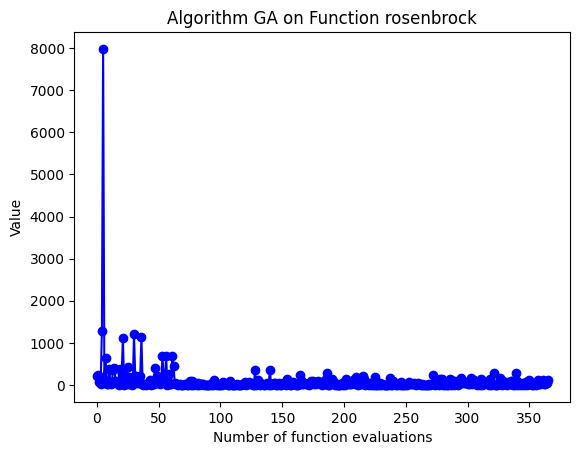

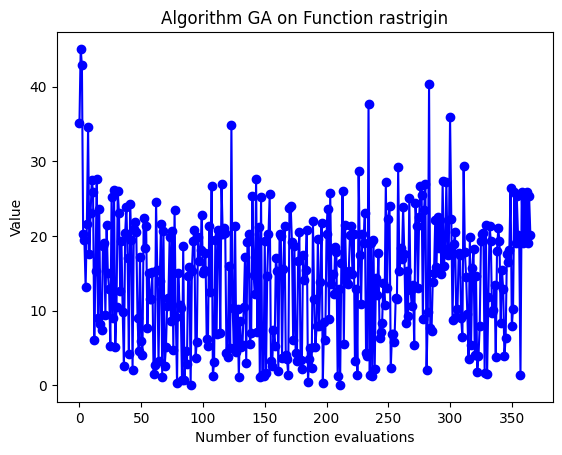

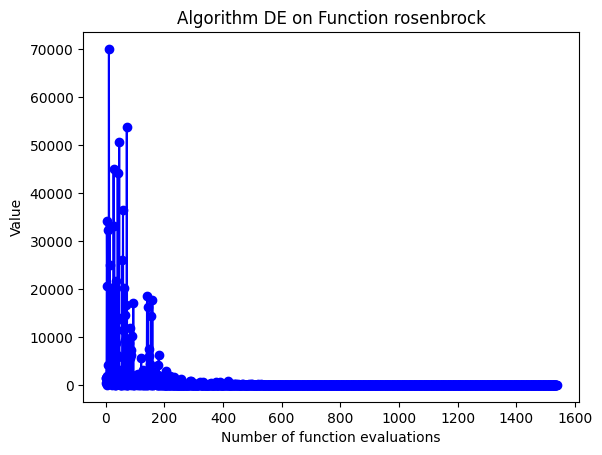

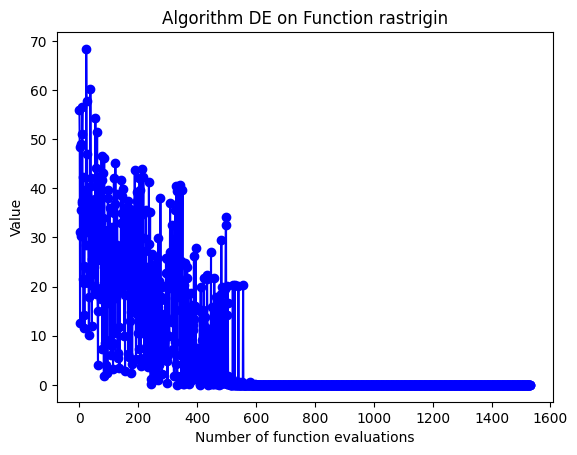

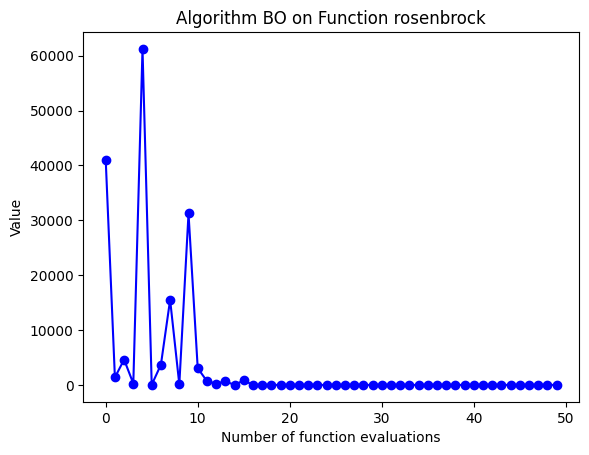

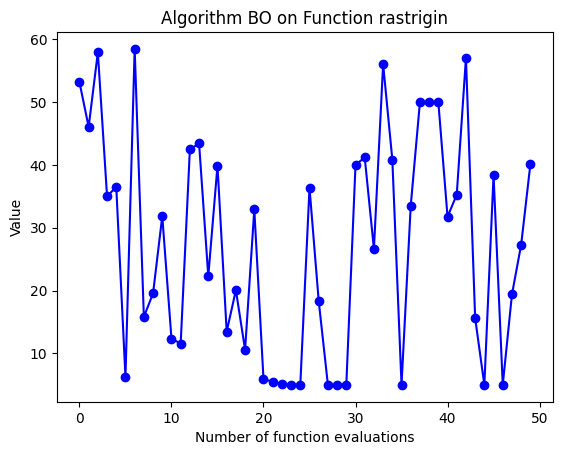

In [26]:
# TODO: Use this Plotter to test your implementation
import matplotlib.pyplot as plt

def convergence_plot(alg, func):
    x0, f0, trj = alg(func)
    # Plot the values
    plt.plot(trj.vals, marker='o', linestyle='-', color='b')
    # Add labels and title
    plt.xlabel('Number of function evaluations')
    plt.ylabel('Value')
    plt.title('Algorithm ' + str(alg.__name__) + ' on Function ' + str(func.__name__))
    # Display the plot
    plt.show()

for alg in [GA, DE, BO]:
    for func in [rosenbrock, rastrigin]:
        convergence_plot(alg, func)


## Part 2: IOH
<img title="a title" alt="Alt text" src="Diagram_1.svg">

### Explanation
- Metaheuristics do not have a guaranteed convergence to optima (++ After a finite number of steps the meta-heuristics might not get to the optima of a function). Therefore, to assess the performance of a meta-heuristic, several runs shall be made, wherein it's expected the algorithm to yield values close to the optima in a consistent manner. 
- Different initial conditions "might" yield difference results.
- The "No free lunch theorem":
    + Some algorithms might perform well for certain landscapes (optimization problems) at the expense of not performing well in others. 
    + To assess a overall performance of a meta-heuristic, it should be tested for different problems (functions).

### Framework
In this section, we will work with the IOH Framework (Jacob de Nobel, Furong Ye, Diederick Vermetten, Hao Wang, Carola Doerr and Thomas Bäck, IOHexperimenter: Benchmarking Platform for Iterative Optimization Heuristics, arXiv e-prints:2111.04077, 2021.)

This framework facilitates the logging process and enables to follow-up the workflow shown before. For more details, check: https://github.com/IOHprofiler/IOHexperimenter.

If you would like more insight on how to use the toolbox, go to:
- Jupyter Notebook example: https://github.com/IOHprofiler/IOHexperimenter/blob/master/example/tutorial.ipynb
- Plain code example: https://iohprofiler.github.io/IOHexperimenter/python

In [31]:
# This is a prelude to manage the files that will be generated during this exercise
import os
import glob

from shutil import rmtree

def clean():
    for name in ("my-experiment", "ioh_data"):
        for path in glob.glob(f"{name}*"):
            if os.path.isfile(path):
                os.remove(path)
            if os.path.isdir(path):
                rmtree(path, ignore_errors=True)

def ls(p="./"):
    for obj in os.listdir(os.path.normpath(p)):
        print(obj)

def cat(f):
    with open(os.path.normpath(f)) as h:
        print(h.read())

clean()

In [32]:
# Import the IOH library
# pip install ioh
import ioh

# Import numpy ## For Numerical Processing
import numpy as np

# Import Pandas (for easy data plotting and management)
# pip install pandas
import pandas as pd

# Import pyplot ## For plotting purposes
import matplotlib.pyplot as plt

# Import the IOH Parser
# This is given in the same repository as the exercise as the IOH Analyzer Server is down at this moment
from IOH_parser import IOH_Parser

IOH enables to call functional evaluations in a modular manner. For this example on usage IOH has incorporated sample functions from both COCO/BBOB benchmarks. The signature uses the Problem class within IOH.

For example, with IOH the Rosenbrock function can be called as follows:

In [33]:
rosenbrock_2d_problem = ioh.get_problem(
    "Rosenbrock", 
    instance=1,
    dimension=2,
    problem_class=ioh.ProblemClass.REAL
)

Other functions, such as the Sphere Function, could be called too. The numbering is performed according to the order in the BBOB (the Sphere function is ordered as the first one):

In [34]:
sphere_2D_problem = ioh.get_problem(
    1, 
    instance=1,
    dimension=2,
    problem_class=ioh.ProblemClass.REAL
)

Besides, a desirable feature from IOH is that it allows to wrap custom-made problems. In the following block, a generator of the 2D-Rosenbrock Function is implemented. Building classes to generate functions, which are called with the `__call__` method is a good practice. Nevertheless, IOH enables also to instantiate functions to be wrapped into the `Problem` class.

In [35]:
class Rosenbrock_2D_Problem_Generator:

    def __init__(self,a:float=1.0, b:float=100.0, x_opt:np.ndarray=[-0.0, -0.0] , f_opt:float=0.0 ):
        self.a = a
        self.b = b
        self.x_opt = x_opt
        self.f_opt = f_opt
    
    def __call__(self,x:np.ndarray):

        # Compute Z
        z = (x-self.x_opt)+1
        return np.sum(self.b*(z[1:] - z[:-1]**2.0)**2.0 + (self.a - z[:-1])**2.0) + self.f_opt


**Important**

Whenever a `Problem` is called from IOH, the defined optimum ${\mathbf{x}_{\text{opt}},f_{\text{opt}}}$ changes. This condition could be accessed by using the property `*.optimum`.

In [36]:
rosenbrock_2d_problem.optimum

<Solution x: [-0.055199999999999916, -0.37080000000000013] y: 149.15>

With the following block, the hard coded Rosenbrock function matches the one called using IOH. By using these function generators, an instance of the Rosenbrock function is stored. Then by calling the object with the `__call__` method, the Rosenbrock function with the defined optimum shall be computed. 

In the following block, the output of the function `rosenbrock_hard_coded` shall match the values of the `*.optimum` property.

In [37]:
rosenbrock_hard_coded = Rosenbrock_2D_Problem_Generator(x_opt=rosenbrock_2d_problem.optimum.x,
                                                        f_opt=rosenbrock_2d_problem.optimum.y)


print("The vector x={0} maps to {1} with the IOH Rosenbrock".format(rosenbrock_2d_problem.optimum.x,
                                                        rosenbrock_2d_problem(rosenbrock_2d_problem.optimum.x)))

print("The vector x={0} maps to {1} with the Hard Coded Rosenbrock".format(rosenbrock_2d_problem.optimum.x,
                                                        rosenbrock_hard_coded(rosenbrock_2d_problem.optimum.x)))

The vector x=[-0.0552 -0.3708] maps to 149.15 with the IOH Rosenbrock
The vector x=[-0.0552 -0.3708] maps to 149.15 with the Hard Coded Rosenbrock


As mentioned, IOH allows to wrap functions. This is performed in the following block. In the first part of the block, the wrapper is called and takes the generated object as a parameter.

In the second part of the code, the wrap is called and stored as a variable. Take into account that the `wrap_real_problem` function stores the definition of the function with an alias or `name`. Then the function `get_problem` must receive that same alias to point to the function.

In [38]:
ioh.problem.wrap_real_problem(
    rosenbrock_hard_coded,                               # Handle to the function
    name="Rosenbrock_2D_Hardcoded",                      # Name to be used when instantiating
    optimization_type=ioh.OptimizationType.MIN,          # Specify that you want to maximize/minimise
    lb=-5,                                               # The lower bound
    ub=5                                                 # The upper bound
)

rosenbrock_wrap= ioh.get_problem("Rosenbrock_2D_Hardcoded",  # The name or alias
                                 instance=2,                 # The instance ID
                                 dimension=2                 # Dimension of the problem ('2' in this case)
                                 )

### Exercise 4:
1. Implement an object generator of the Sphere Problem. In this case just focus on the two-dimensional problem. Recall the equation of the problem is:
$$f_1(\mathbf{x}) = ||\mathbf{z}||^2 + f_{\text{opt}} $$
where
$$\mathbf{z} = \mathbf{x} - \mathbf{x^{\text{opt}}}$$

2. Generate an instance of your Sphere problem. With the `sphere_2D_problem` object check your hand-made objective function yields the same optimum for the hand-picked optimum vector.

3. Wrap the instance with `ioh.problem.wrap_real_problem`.

In [39]:
# ---------------------
# Your code goes here!
# ---------------------

class Sphere_2D_Problem_Generator:
    def __init__(self,x_opt:np.ndarray,f_opt:float) -> None:
        
        # TODO: Insert the declaration of parameters required 
        self.x_opt = x_opt
        self.f_opt = f_opt
    
    def __call__(self,x:np.ndarray):
        
        # TODO: Modify the call function and implement the definition
        dot_product = np.dot((x-self.x_opt),(x-self.x_opt))
        return dot_product + self.f_opt

        

In [40]:
# TODO: Call an instance of your Sphere generator
sphere_hard_coded = Sphere_2D_Problem_Generator(x_opt=sphere_2D_problem.optimum.x,
                                                        f_opt=sphere_2D_problem.optimum.y)


print("The vector x={0} maps to {1} with the IOH Sphere".format(sphere_2D_problem.optimum.x,
                                                        sphere_2D_problem(sphere_2D_problem.optimum.x)))

print("The vector x={0} maps to {1} with the Hard Coded Sphere".format(sphere_2D_problem.optimum.x,
                                                        sphere_hard_coded(sphere_2D_problem.optimum.x)))

The vector x=[ 0.2528 -1.1568] maps to 79.48 with the IOH Sphere
The vector x=[ 0.2528 -1.1568] maps to 79.48 with the Hard Coded Sphere


In [41]:

ioh.problem.wrap_real_problem(
    sphere_hard_coded,                       # TODO: Handle to the function
    name="Sphere_2D_Hardcoded",                      # Name to be used when instantiating
    optimization_type=ioh.OptimizationType.MIN,          # Specify that you want to maximize/minimise
    lb=-5,                                               # The lower bound
    ub=5                                                 # The upper bound
)


In [42]:
# TODO: Run this cell to wrap the problem
Sphere_wrap= ioh.get_problem("Sphere_2D_Hardcoded",  # The name or alias
                                 instance=1,                 # The instance ID
                                 dimension=2                 # Dimension of the problem ('2' in this case)
                                 )

IOH requires the formulation of an algorithm which optimizes the objective. IOH enables both handling from a tailor-made algorithm as the default Random Search or calling a external algorithm from a library (for example `scipy`, `scikit-learn`). In the following block, the example of a Random Search algorithm is implemented. Similarly to the generators, the `__call__` method is used to activate the optimization procedure. This signature allows for information about an algorithm to be tracked such as a dynamic changing parameter.

In [43]:
class RandomSearch:

    def __init__(self, budget):
        #Note that we should re-initialize all dynamic variables if we want to run the same algorithm multiple times
        self.budget = budget

        self.algorithm_id = np.random.randint(100)

    def __call__(self, problem:ioh.problem.RealSingleObjective):
        self.f_opt = np.Inf
        self.x_opt = None
        
        for _ in range(self.budget):
            x = np.random.uniform(problem.bounds.lb, problem.bounds.ub)

            f = problem(x)
            if f < self.f_opt:
                self.f_opt = f
                self.x_opt = x

        return self.f_opt, self.x_opt

    def reset(self):
        self.algorithm_id = np.random.randint(100)

With the last block in mind, you could log your results by attaching a logger to one of the problems. In the following block the setup of the logger is done. Keep in mind that in this case the logger is attached to one instance.

Additionally, towards the end of the block, there is a commented line, in which the `watch` is set to the logger. This is useful in case there are changing parameters of the algorithm and you would like to track the evolution of these parameters. These parameters should be set as properties of the algorithm object. 

In [44]:
# Call the instance of the algorithm 
algorithm = RandomSearch(50)

# Set the trigger characteristics (when to save evaluations done by the algorithm)
triggers = [
    ioh.logger.trigger.Each(2),
    ioh.logger.trigger.OnImprovement()
]

l1 = ioh.logger.Analyzer(folder_name="my-experiment",
                         store_positions= True,
                         triggers=triggers,
                         algorithm_name="Random Search",
                         root = os.getcwd())

# Track variables static over the couse of an algorithm run
l1.add_run_attributes(algorithm, ["algorithm_id"])

# Track dynamic variables, updated during the run of an algorithm
#l3.watch(algorithm, ["a_property", "a_tracked_parameter"])

# Attach the logger 
rosenbrock_wrap.attach_logger(l1)


Afterwards, an experiment with arbitrary number of runs would look like this.

In [45]:
def my_experiment(problem:ioh.problem.RealSingleObjective,algorithm,n_runs:int=10):
    for run in range(n_runs):

        # Run the algorithm
        algorithm(problem)
        # print the best found for this run
        print(f"run: {run+1} - best found:{problem.state.current_best.y: .3f}")
        algorithm.reset()
        problem.reset()

In [46]:
# Run the experiment with $10$ runs and a budget for Random Search of $50$ evaluations.  
my_experiment(rosenbrock_wrap,algorithm,n_runs=10)

run: 1 - best found: 149.794
run: 2 - best found: 149.767
run: 3 - best found: 156.888
run: 4 - best found: 151.976
run: 5 - best found: 153.634
run: 6 - best found: 157.785
run: 7 - best found: 152.303
run: 8 - best found: 152.625
run: 9 - best found: 152.722
run: 10 - best found: 152.600


After running the experiment, a folder will appear in your working directory with a JSON file and a folder pointed by the JSON file with the saved results of the experiment by the logger.

A similar procedure could be performed by using the `Experiment` library from IOH as follows:

In [47]:

# exp = ioh.Experiment(
#     RandomSearch(50),                   # instance of optimization algorithm
#     [rosenbrock_wrap.meta_data.problem_id],                                # list of problem id's
#     [2],                             # list of problem instances
#     [2],                                # list of problem dimensions
#     #problem_class = rosenbrock_wrap.meta_data.problem_id,  # the problem type, function ids should correspond to problems of this type
#     njobs = 1,                          # the number of parallel jobs for running this experiment
#     reps = 10,                           # the number of repetitions for each (id x instance x dim)
#     store_positions=True, 
#     folder_name= "my-experiment",
#     logger_triggers= triggers,
#     #logged_attributes = [               # list of the tracked variables, must be available on the algorithm instance (RandomSearch)
#     #    "a_property",
#     #    "a_tracked_parameter"
#     #],
#     zip_output= False,
# )

# exp.run()


### Exercise 5:
1. Wrap the `scipy.optimize.minimize(method='Nelder-Mead")` function by taking as example the `Random_Search` class. The Nelder-Mead optimization algorithm which uses construction of simplices and transformation (in 2-D the simplex is a triangle) For more information go to https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize.
2. Create the`my_new_experiment` function which sets random starting points for the Nelder Mead Algorithm.
3. Generate a new logger and attach it to the Rosenbrock 2D Problem instances (derived from IOH). Set the logger in a way to keep track of the starting point `x_0`. 
4. Run experiments with the different starting points. Check you results. Does the starting point of the algorithm play a role in the final outcome?

In [48]:
# Import the optimization package from Scipy
import scipy.optimize as optim

# Generate a new instance of the Rosenbrock wrap
rosenbrock_wrap_2= ioh.get_problem("Rosenbrock_2D_Hardcoded",  # The name or alias
                                 instance=3,                 # The instance ID
                                 dimension=2                 # Dimension of the problem ('2' in this case)
                                 )


# This class will wrap the calls to the Nelder-Mead method
class Nelder_Mead:
    def __init__(self, budget:int):
        # Start a number of iterations
        self.nit:int = 0

        #TODO: Set the member variables 
        self.budget:int = budget
        self.algorithm_id:int = np.random.randint(100)
        self.__x_init = None

        # ---- End of __init__()

    # This callback function is to enforce termination of the algorithm 
    # in case the algorithm does not converge before the budget
    def __callback(self, intermediate_result:optim.OptimizeResult):

        # Add one iteration to the counter
        self.nit +=1
        #if self.nit >= self.budget-1:
        #    print("Exceeded iterations")
            #raise StopIteration("Exceeded budget of iterations")
        tt = 1

    def __call__(self, problem:ioh.problem.RealSingleObjective,x_init:np.ndarray):
        
        self.__x_init:np.ndarray = x_init
        results = optim.minimize(method="Nelder-Mead",
                                 fun=problem,
                                 x0=self.__x_init,
                                 callback =self.__callback,
                                 options={'maxiter':self.budget,'disp':False})
        
        self.x_opt = results.x
        self.f_opt = problem(self.x_opt)

        return self.f_opt, self.x_opt

    def reset(self):

        self.nit = 0
        
        # TODO: When calling this member function, take into account the algorithm id 
        # and the initial point shall be restarted
        self.algorithm_id = np.random.randint(100)
        self.__x_init = None
        

        # End of reset code
    
    @property
    def x_init_0(self):
        return self.__x_init[0]
    
    @property
    def x_init_1(self):
        return self.__x_init[1]


In [49]:
def my_new_experiment(problem:ioh.problem.RealSingleObjective,algorithm_,n_runs:int=10):
    
    for run in range(n_runs):
        ## TODO: Your implementation starts here: 

        # Generate a random starting point
        x0 = np.random.uniform(problem.bounds.lb, problem.bounds.ub)
        
        # Run the algorithm
        algorithm_(problem,x0)
        
        ## End of implementation 


        # print the best found for this run
        print(f"run: {run+1} - best found:{problem.state.current_best.y: .3f}")
        algorithm_.reset()
        problem.reset()

In [50]:
# Call an instance of the Nelder-Mead algorithm
algorithm = Nelder_Mead(50)

# Set the trigger characteristics (when to save evaluations done by the algorithm)
triggers = [
    ioh.logger.trigger.Each(2),
    ioh.logger.trigger.OnImprovement()
]

# TODO: Implement your logger
l2 = ioh.logger.Analyzer(folder_name="my-experiment-Nelder_Mead",
                         store_positions= True,
                         triggers=triggers,
                         algorithm_name="Nelder_Mead",
                         root = os.getcwd())

# End of your code ---------------------------------------


# Track variables static over the couse of an algorithm run
# Activate this line to have track of the id as an attribute. Check in the file
#l2.add_run_attribute(algorithm, "algorithm_id")

# Track dynamic variables, updated during the run of an algorithm
# Activate this line to have track of the the initial positions
# l2.watch(algorithm, ["x_init_1","x_init_2"])

# Attach the logger 
rosenbrock_wrap_2.attach_logger(l2)

In [51]:
# TODO: Run the function
# Run the experiment with $10$ runs and a budget for Nelder-Mead of $50$ evaluations.  
my_new_experiment(rosenbrock_wrap_2,algorithm,n_runs=10)

run: 1 - best found: 149.150
run: 2 - best found: 149.162
run: 3 - best found: 149.467
run: 4 - best found: 149.150
run: 5 - best found: 149.157
run: 6 - best found: 149.150
run: 7 - best found: 149.150
run: 8 - best found: 149.151
run: 9 - best found: 149.809
run: 10 - best found: 150.094


In [52]:
# This closes the loggers
l1.close()
l2.close()

### Plotting Reference
This section is for you to use a parser to process the files. The parser receives a JSON file and processes the information.

In [53]:
# Generates a IOH Parse object which takes the path from a json file with follows the IOH Analyzer protocol
parser = IOH_Parser("my-experiment-Nelder_Mead\\IOHprofiler_f1121_Rosenbrock_2D_Hardcoded.json")

TypeError: exceptions must derive from BaseException

In [40]:
# Prints the 
parser.return_complete_table_per_instance(0)

,run,evaluations,Objective,x0,x1
0,1,1,94944.660602,4.910282,3.431297
1,1,2,114247.124904,5.155796,3.431297
2,1,3,93891.283673,4.910282,3.602861
3,1,4,77146.423975,4.664768,3.602861
4,1,5,62220.965077,4.419254,3.688644
...,...,...,...,...,...
676,10,89,149.175608,0.091016,-0.050485
677,10,90,149.199282,-0.004815,-0.289112
678,10,92,149.221472,0.149650,0.098042
679,10,93,149.168336,0.073521,-0.100994


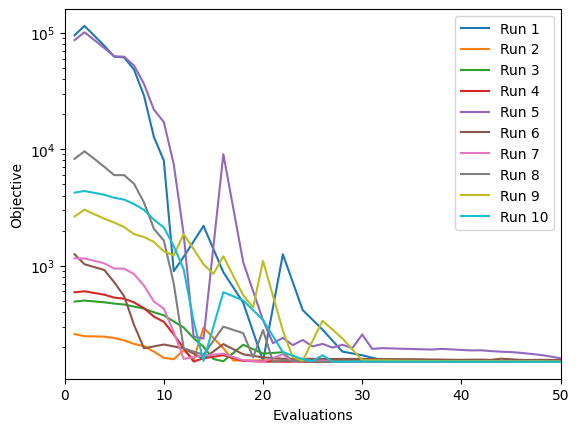

In [41]:
fig, ax = plt.subplots()
for a in range(parser.number_of_instances):
    df = parser.return_complete_table_per_instance(a)
    run_arrays = pd.unique(df['run'])

    for run in run_arrays:
        df_2 = df[df['run']==run]
        ax.semilogy(df_2['evaluations'],df_2['Objective'],label=f"Run {run}")
        
ax.set_xlim(0,50)        
ax.legend(loc="upper right")
ax.set_xlabel("Evaluations")
ax.set_ylabel("Objective")
plt.show()